# Task 2

Explore how accurately you can predict whether someone will have an optimal vitamin D result before testing their levels, from other information about them in the dataset. What are your conclusions? Do not spend too much time cleaning and transforming data, feel free to write a few notes about what more you would do given time/the limitations of your exploration.

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier

from thriva.model import ModelSelection, encoded_logistic_regression, prepare_data

/home/rgd/git/Applied_data_scientist_take-home


In [2]:
X_train, X_test, y_train, y_test = prepare_data()
model_list = [encoded_logistic_regression(), LGBMClassifier(), DummyClassifier()]

In [3]:
models = ModelSelection(models=model_list)
models.fit(X_train, y_train)
models.score(X_test, y_test)

/home/rgd/miniconda3/envs/thriva/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogisticRegression,LGBMClassifier,DummyClassifier
accuracy,0.634,0.638,0.581
auc,0.665,0.675,0.500
precision,0.583,0.591,0.000
recall,0.447,0.447,0.000


In [4]:
# Clean NaN values from the training data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = prepare_data(clean_na=True)
models_clean = ModelSelection(models=model_list)
models_clean.fit(X_train_clean, y_train_clean)
models_clean.score(X_test_clean, y_test_clean)

/home/rgd/miniconda3/envs/thriva/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogisticRegression,LGBMClassifier,DummyClassifier
accuracy,0.647,0.655,0.549
auc,0.705,0.709,0.500
precision,0.603,0.607,0.000
recall,0.641,0.666,0.000


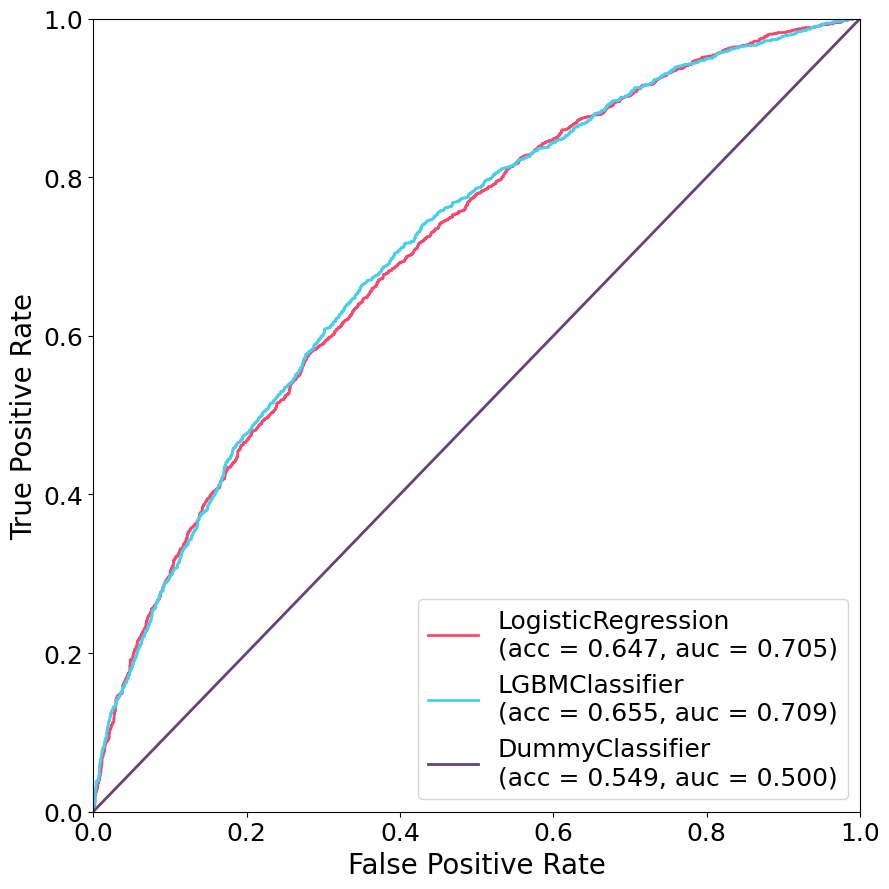

In [5]:
models.roc_plot(X_test, y_test)
plt.savefig("reports/roc_curve.png", dpi=300)
plt.close()
models_clean.roc_plot(X_test_clean, y_test_clean)
plt.savefig("reports/roc_curve_clean.png", dpi=300)
plt.show()

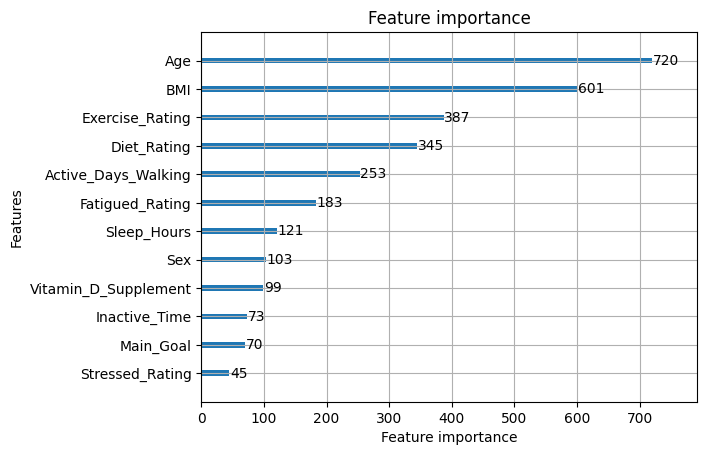

In [6]:
importances = models_clean.importance_plot()
importances["LGBMClassifier"]
plt.savefig("LGBM_feature_importance.png", dpi=300)